# Grouping

Chapter 9 in Python for Data Analysis demonstrates a variety of methods to analyze data via data aggregation and grouping operations. Those are the focus of this session.  Our overall goal for this session is to do Exploratory Data Analysis, which is essentially looking at and probing our data to learn about the patterns we can discover in them.  Often this can generate a better understanding of problems in the data, as well as revealing relationships that might be worth exploring in more depth.


For this exercise, we will use 2010 US Census data, for all census tracts in Kentucky.  A good starting point for any kind of Census data is the American Fact Finder: 

https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

The Census Bureau produces several products, the most famous of which is the decennial census, which as its name implies, is a true Census.  There are a limited number of data fields for the whole population (or at least those that the Census workers are able to reach, which is pretty good).  The Census has other products that are surveys, such as the American Community Survey (ACS) which asks more detailed questions on an annual basis from a 1% sample of households.  

In this case, we are working with file DP-1: Profile of General Population and Housing Characteristics: 2010, which is also a part of something called Summary File 1 (SF-1).  It is for the 100% sample.  A data dictionary for selected fields is below.  

In [7]:
import pandas as pd

# skip the second row, which contains descriptions
sf1 = pd.read_csv('data/DEC_10_SF1_combined.csv', skiprows =[1])

# make the tract, county and state separate
sf1['tract'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[0])
sf1['county'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[1])
sf1['state'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[2])

# compute some derived fields
sf1['pct_rent'] = sf1['H4-D004'] / sf1['H4-D001'] * 100
sf1['pct_black'] = sf1['P3-D003'] / sf1['P3-D001'] * 100
sf1['pct_asian'] = sf1['P3-D005'] / sf1['P3-D001'] * 100
sf1['pct_white'] = sf1['P3-D002'] / sf1['P3-D001'] * 100
sf1['pct_hisp'] = sf1['P4-D003'] / sf1['P4-D001'] * 100
sf1['pct_vacant'] = sf1['H5-D001'] / sf1['H1-D001'] * 100
sf1[:5]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,...,106,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,...,109,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542


In [2]:
pd.options.display.max_columns=50

In [3]:
sfff = pd.read_csv ('data/DEC_10_SF1_combined.csv', skiprows=[1])
sfff['Census Tract']=sf1['GEO.display-label'].str.split(',').str[0].str.strip('Census Tract ')
sfff['County']=sf1['GEO.display-label'].str.split(',').str[1].str.strip (' County')
sfff['State']=sf1['GEO.display-label'].str.split(',').str[2]
sfff [:5]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,H5-D003,H5-D004,H5-D005,H5-D006,H5-D007,H5-D008,Census Tract,County,State
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,20,8,1727,1690,37,780,780,649,131,649,285,251,113,131,6,0,15,9,41,0,60,9701,Adair,Kentucky
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,31,10,1722,1677,45,930,930,696,234,696,345,217,134,234,18,1,17,4,159,0,35,9702,Adair,Kentucky
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,19,28,3016,2960,56,1448,1448,1228,220,1228,507,469,252,220,27,0,15,31,40,1,106,9703,Adair,Kentucky
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,39,60,4070,4007,63,1973,1973,1760,213,1760,585,520,655,213,47,5,25,6,21,0,109,9704.01,Adair,Kentucky
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,43,53,4261,4180,81,1589,1589,1404,185,1404,565,405,434,185,60,1,25,18,11,0,70,9704.02,Adair,Kentucky


## Groupby and Aggregation Operations

Groupby is a powerful method in pandas that follows the split-apply-combine approach to data.  As shown in Figure 9-1 in the context of a sum operation, the data is first split into groups that share the same key values.  Then an operation, in this case a sum, is applied to each group.  Then the results are combined.

The built-in aggregation methods available for groupby operations include:
* count
* sum
* mean
* median
* std, var
* min, max
* first, last

You can also apply your own functions as aggregation methods.

![Groupby Operations](groupby.png "Groupby")

Let's apply this approach to computing total population in each county in our dataset.  We can do this in two steps to help explain what is happening.  First we create a groupby object, using county codes to group all the census blocks in sf1 into groups that share the same county code.

In [4]:
grouped = sf1['P1-D001'].groupby(sf1['county'])
grouped

Now that we have this grouping object that represents the **split** part of the workflow in the figure above, we can **apply** operations and **combine** the results using methods like sum:

In [5]:
grouped.sum()

county
 Adair County            18656
 Allen County            19956
 Anderson County         21421
 Ballard County           8249
 Barren County           42173
 Bath County             11591
 Bell County             28691
 Boone County           118811
 Bourbon County          19985
 Boyd County             49542
 Boyle County            28432
 Bracken County           8488
 Breathitt County        13878
 Breckinridge County     20059
 Bullitt County          74319
 Butler County           12690
 Caldwell County         12984
 Calloway County         37191
 Campbell County         90336
 Carlisle County          5104
 Carroll County          10811
 Carter County           27720
 Casey County            15955
 Christian County        73955
 Clark County            35613
 Clay County             21730
 Clinton County          10272
 Crittenden County        9315
 Cumberland County        6856
 Daviess County          96656
                         ...  
 Nicholas County          7135
 

We might want to capture the result in a DataFrame if we want to use it in other processing, like merging the results to the original DataFrame.

In [9]:
grouped.describe (percentiles = [0.2,0.95])

,count,mean,std,min,20%,50%,95%,max
county,,,,,,,,
Adair County,7.0,2665.142857,1158.263273,1403.0,1723.0,2457.0,4203.70,4261.0
Allen County,6.0,3326.000000,1148.455310,1600.0,2703.0,3238.0,4636.75,4685.0
Anderson County,5.0,4284.200000,2553.155832,1969.0,2205.8,3651.0,7605.60,8164.0
Ballard County,3.0,2749.666667,1399.845110,1494.0,1894.8,2496.0,4082.70,4259.0
Barren County,10.0,4217.300000,1180.954609,3065.0,3473.0,3624.5,5924.85,5937.0
Bath County,3.0,3863.666667,2211.611253,1791.0,2517.8,3608.0,5933.60,6192.0
Bell County,9.0,3187.888889,1142.095710,1896.0,2306.2,2849.0,4988.80,5150.0
Boone County,22.0,5400.500000,2638.800896,0.0,3053.8,5520.5,9744.95,11018.0
Bourbon County,6.0,3330.833333,1475.283758,2180.0,2329.0,2741.5,5507.25,6018.0


In [10]:
grouped.mean ()

county
 Adair County           2665.142857
 Allen County           3326.000000
 Anderson County        4284.200000
 Ballard County         2749.666667
 Barren County          4217.300000
 Bath County            3863.666667
 Bell County            3187.888889
 Boone County           5400.500000
 Bourbon County         3330.833333
 Boyd County            3810.923077
 Boyle County           4061.714286
 Bracken County         2829.333333
 Breathitt County       1982.571429
 Breckinridge County    3343.166667
 Bullitt County         4128.833333
 Butler County          2538.000000
 Caldwell County        4328.000000
 Calloway County        4132.333333
 Campbell County        3613.440000
 Carlisle County        1701.333333
 Carroll County         3603.666667
 Carter County          3960.000000
 Casey County           3191.000000
 Christian County       3892.368421
 Clark County           3561.300000
 Clay County            3621.666667
 Clinton County         3424.000000
 Crittenden County   

In [32]:
county_pop = sf1['P1-D001'].groupby(sf1['county']).sum().to_frame(name='county_population')
county_pop

,county_population
county,
Adair County,18656
Allen County,19956
Anderson County,21421
Ballard County,8249
Barren County,42173
Bath County,11591
Bell County,28691
Boone County,118811
Bourbon County,19985


Here we merge the county total population with sf1 and create a new DataFrame.

In [33]:
sf2 = pd.merge(sf1,county_pop, left_on='county', right_index=True)
sf2[:5]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,H5-D003,H5-D004,H5-D005,H5-D006,H5-D007,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,county_population
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,20,8,1727,1690,37,780,780,649,131,649,285,251,113,131,6,0,15,9,41,0,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872,18656
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,31,10,1722,1677,45,930,930,696,234,696,345,217,134,234,18,1,17,4,159,0,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290,18656
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,19,28,3016,2960,56,1448,1448,1228,220,1228,507,469,252,220,27,0,15,31,40,1,106,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370,18656
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,39,60,4070,4007,63,1973,1973,1760,213,1760,585,520,655,213,47,5,25,6,21,0,109,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743,18656
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,43,53,4261,4180,81,1589,1589,1404,185,1404,565,405,434,185,60,1,25,18,11,0,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542,18656


## Transforming Data with Groupby

In some cases you may want to apply a function to your data, by group.  An example would be to normalize a column by a mean of each group.  Say we wanted to subtract the mean population density of each county from the population density of each census block. We could write a function to subtract the mean from each value, and then use the transform operation to apply this to each group:

In [13]:
def demean(arr):
    return arr - arr.mean()

Now we can apply this tranformation to columns in our dataframe.  As examples, let's 'demean' the pct_black and pct_rent columns, subtracting the county-wide mean of these values from the tract-specific values, so that the result is transformed to have a mean of zero within each county.

To check the results, we print the means per county, then the original values for the first 5 rows, then the transformed results.  The transformed results we should be able to calculate by subtracting the appropriate county mean from the tract value.

In [ ]:
normalized = sf1[['pct_black', 'pct_rent']].groupby(sf1['county']).transform(demean)
print(sf1[['pct_black', 'pct_rent']].groupby(sf1['county']).mean())
print(sf1[['county','pct_black', 'pct_rent']][:5])
print(normalized[:5])

We can merge these transformed results on to the original DataFrame, and check the means of the original variables and the tranformed ones.  The transformed ones should be arbitrarily close to zero.

In [ ]:
sf2 = pd.merge(sf1,normalized, left_index=True, right_index=True)

sf2.groupby('county')[['pct_black_x', 'pct_black_y', 'pct_rent_x', 'pct_rent_y']].mean()

Apply is a method we have learned previously, which allows us to apply a function to each row in a DataFrame.  We can also combine apply with groupby to apply functions based on group membership.  For example, the function 'top' sorts an array and selects the top n rows from it.  We provide some defaults for the arguments of how many rows, and the column to use for the selection:

In [14]:
def top(df, n=5, column='pct_rent'):
    return df.sort_values(by=column, ascending=False).head(n)

Using this on the full dataset and setting the number of rows and the column to get the top values for, in this case using pct_rent to override the default argument, we get the top 10 tracts in the region in terms of percentage rental.

In [15]:
top(sf1, n=10, column='pct_rent')

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,H5-D003,H5-D004,H5-D005,H5-D006,H5-D007,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
255,1400000US21061980100,21061980100,"Census Tract 9801, Edmonson County, Kentucky",8,8,8,0,0,0,0,0,0,8,8,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,Census Tract 9801,Edmonson County,Kentucky,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000
508,1400000US21111003000,21111003000,"Census Tract 30, Jefferson County, Kentucky",3565,3565,258,3187,15,1,16,18,70,3565,3519,46,1408,1408,1297,111,1297,1,2,1294,111,104,0,0,0,0,0,7,Census Tract 30,Jefferson County,Kentucky,99.768697,89.396914,0.028050,7.237027,1.290323,7.883523
200,1400000US21047201501,21047201501,"Census Tract 2015.01, Christian County, Kentucky",5315,5315,3580,982,64,47,81,197,364,5315,4518,797,1428,1428,1327,101,1327,1,3,1323,101,90,3,0,0,0,0,8,Census Tract 2015.01,Christian County,Kentucky,99.698568,18.476011,0.884290,67.356538,14.995296,7.072829
415,1400000US21093000202,21093000202,"Census Tract 2.02, Hardin County, Kentucky",4514,4514,3053,863,45,78,20,171,284,4514,3844,670,1326,1326,1247,79,1247,3,1,1243,79,58,0,0,0,0,0,21,Census Tract 2.02,Hardin County,Kentucky,99.679230,19.118299,1.727957,67.634027,14.842712,5.957768
872,1400000US21163970200,21163970200,"Census Tract 9702, Meade County, Kentucky",2683,2683,1916,414,41,30,15,89,178,2683,2259,424,1228,1228,823,405,823,4,2,817,405,238,2,1,0,3,0,161,Census Tract 9702,Meade County,Kentucky,99.270960,15.430488,1.118151,71.412598,15.803205,32.980456
201,1400000US21047201502,21047201502,"Census Tract 2015.02, Christian County, Kentucky",4527,4527,3055,740,45,61,84,221,321,4527,3712,815,1260,1260,1178,82,1178,3,10,1165,82,71,3,0,0,2,0,6,Census Tract 2015.02,Christian County,Kentucky,98.896435,16.346366,1.347471,67.483985,18.003093,6.507937
414,1400000US21093000201,21093000201,"Census Tract 2.01, Hardin County, Kentucky",1409,1409,1150,153,9,19,6,32,40,1409,1262,147,406,406,290,116,290,2,2,286,116,27,0,0,0,29,0,60,Census Tract 2.01,Hardin County,Kentucky,98.620690,10.858765,1.348474,81.618169,10.432931,28.571429
833,1400000US21151010500,21151010500,"Census Tract 105, Madison County, Kentucky",4182,4182,3699,330,11,56,6,16,64,4182,4112,70,279,279,255,24,255,8,2,245,24,15,0,1,0,1,0,7,Census Tract 105,Madison County,Kentucky,96.078431,7.890961,1.339072,88.450502,1.673840,8.602151
270,1400000US21067000801,21067000801,"Census Tract 8.01, Fayette County, Kentucky",4094,4094,3255,385,6,356,2,18,72,4094,4012,82,397,397,251,146,251,5,6,240,146,133,0,0,0,0,0,13,Census Tract 8.01,Fayette County,Kentucky,95.617530,9.404006,8.695652,79.506595,2.002931,36.775819
142,1400000US21037050100,21037050100,"Census Tract 501, Campbell County, Kentucky",1733,1733,1197,368,1,43,0,26,98,1733,1669,64,873,873,804,69,804,25,19,760,69,57,0,1,0,0,0,11,Census Tract 501,Campbell County,Kentucky,94.527363,21.234853,2.481246,69.070975,3.693018,7.903780


Below we apply this with groupby and use the defaults for n and column, and it applies the function within each county and concatenates the results, producing the top 5 blocks on pop_sqmi for each county in the region.

In [16]:
sf1.groupby('county').apply(top)

GEO.id      GEO.id2  \
county                                                       
 Adair County      3     1400000US21001970401  21001970401   
                   4     1400000US21001970402  21001970402   
                   2     1400000US21001970300  21001970300   
                   1     1400000US21001970200  21001970200   
                   5     1400000US21001970500  21001970500   
 Allen County      9     1400000US21003920300  21003920300   
                   10    1400000US21003920400  21003920400   
                   12    1400000US21003920600  21003920600   
                   11    1400000US21003920500  21003920500   
                   8     1400000US21003920200  21003920200   
 Anderson County   14    1400000US21005950201  21005950201   
                   13    1400000US21005950100  21005950100   
                   15    1400000US21005950202  21005950202   
                   17    1400000US21005950400  21005950400   
                   16    1400000US21005950300  21005950300   
 Ballard County    19    1400000US21007950200  21007950200   
                   18    1400000US21007950100  21007950100   
                   20    1400000US21007950300  21007950300   
 Barren County     24    1400000US21009950400  21009950400   
                   26    1400000US21009950600  21009950600   
                   22    1400000US21009950200  21009950200   
                   25    1400000US21009950500  21009950500   
                   23    1400000US21009950300  21009950300   
 Bath County       32    1400000US21011970200  21011970200   
                   31    1400000US21011970100  21011970100   
                   33    1400000US21011970300  21011970300   
 Bell County       39    1400000US21013960600  21013960600   
                   40    1400000US21013960700  21013960700   
                   38    1400000US21013960500  21013960500   
                   35    1400000US21013960200  21013960200   
...                                       ...          ...   
 Union County      1057  1400000US21225950100  21225950100   
 Warren County     1061  1400000US21227010100  21227010100   
                   1064  1400000US21227010400  21227010400   
                   1062  1400000US21227010200  21227010200   
                   1073  1400000US21227011001  21227011001   
                   1063  1400000US21227010300  21227010300   
 Washington County 1086  1400000US21229930200  21229930200   
                   1087  1400000US21229930300  21229930300   
                   1085  1400000US21229930100  21229930100   
 Wayne County      1090  1400000US21231920300  21231920300   
                   1089  1400000US21231920200  21231920200   
                   1091  1400000US21231920400  21231920400   
                   1088  1400000US21231920100  21231920100   
                   1092  1400000US21231920700  21231920700   
 Webster County    1096  1400000US21233960400  21233960400   
                   1093  1400000US21233960100  21233960100   
                   1095  1400000US21233960300  21233960300   
                   1094  1400000US21233960200  21233960200   
 Whitley County    1102  1400000US21235920600  21235920600   
                   1098  1400000US21235920200  21235920200   
                   1097  1400000US21235920100  21235920100   
                   1101  1400000US21235920500  21235920500   
                   1103  1400000US21235920700  21235920700   
 Wolfe County      1106  1400000US21237930200  21237930200   
                   1105  1400000US21237930100  21237930100   
 Woodford County   1107  1400000US21239050103  21239050103   
                   1113  1400000US21239050300  21239050300   
                   1108  1400000US21239050104  21239050104   
                   1114  1400000US21239050400  21239050400   
                   1109  1400000US21239050105  21239050105   

                                                       GEO.display-label  \
county                                                  

Here we pass arguments to the function to set n and the column to select the top value from.

In [17]:
sf1.groupby('county').apply(top, n=1, column='P1-D001')

,,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,H5-D003,H5-D004,H5-D005,H5-D006,H5-D007,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
county,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adair County,4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,43,53,4261,4180,81,1589,1589,1404,185,1404,565,405,434,185,60,1,25,18,11,0,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542
Allen County,9,1400000US21003920300,21003920300,"Census Tract 9203, Allen County, Kentucky",4685,4685,4473,83,19,12,0,16,82,4685,4630,55,2161,2161,1961,200,1961,789,492,680,200,44,3,41,14,12,0,86,Census Tract 9203,Allen County,Kentucky,34.676186,1.771612,0.256137,95.474920,1.173959,9.254975
Anderson County,13,1400000US21005950100,21005950100,"Census Tract 9501, Anderson County, Kentucky",8164,8164,7647,292,5,38,3,75,104,8164,8030,134,3415,3415,3139,276,3139,1807,510,822,276,75,6,65,15,12,0,103,Census Tract 9501,Anderson County,Kentucky,26.186684,3.576678,0.465458,93.667320,1.641352,8.081991
Ballard County,18,1400000US21007950100,21007950100,"Census Tract 9501, Ballard County, Kentucky",4259,4259,4024,145,8,11,0,6,65,4259,4217,42,1989,1989,1757,232,1757,752,616,389,232,36,2,19,11,32,0,132,Census Tract 9501,Ballard County,Kentucky,22.140011,3.404555,0.258277,94.482273,0.986147,11.664153
Barren County,26,1400000US21009950600,21009950600,"Census Tract 9506, Barren County, Kentucky",5937,5937,5331,299,11,40,10,77,169,5937,5772,165,2826,2826,2501,325,2501,821,576,1104,325,157,8,32,12,19,2,95,Census Tract 9506,Barren County,Kentucky,44.142343,5.036214,0.673741,89.792825,2.779181,11.500354
Bath County,32,1400000US21011970200,21011970200,"Census Tract 9702, Bath County, Kentucky",6192,6192,5960,81,20,10,1,51,69,6192,6088,104,2891,2891,2454,437,2454,1089,722,643,437,86,7,53,25,63,1,202,Census Tract 9702,Bath County,Kentucky,26.202119,1.308140,0.161499,96.253230,1.679587,15.115877
Bell County,35,1400000US21013960200,21013960200,"Census Tract 9602, Bell County, Kentucky",5150,5150,5025,69,8,7,2,2,37,5150,5125,25,2432,2432,2166,266,2166,518,904,744,266,70,3,6,11,13,0,163,Census Tract 9602,Bell County,Kentucky,34.349030,1.339806,0.135922,97.572816,0.485437,10.937500
Boone County,47,1400000US21015070307,21015070307,"Census Tract 703.07, Boone County, Kentucky",11018,11018,10057,336,25,361,1,59,179,11018,10809,209,3985,3985,3801,184,3801,2937,408,456,184,18,0,71,13,18,0,64,Census Tract 703.07,Boone County,Kentucky,11.996843,3.049555,3.276457,91.277909,1.896896,4.617315
Bourbon County,66,1400000US21017030200,21017030200,"Census Tract 302, Bourbon County, Kentucky",6018,6018,5136,432,17,43,0,207,183,6018,5631,387,2639,2639,2456,183,2456,1022,344,1090,183,64,2,34,4,6,0,73,Census Tract 302,Bourbon County,Kentucky,44.381107,7.178465,0.714523,85.343968,6.430708,6.934445


## Exploring Correlations in the Data

Pandas provides simple ways of computing correlation coefficients among the columns in your DataFrame.  If you use corr() on a full DF, it will produce a large correlation table.  A bit hard to navigate and you mostly would not be interested in some of these results.

In [19]:
sf1.corr()

,GEO.id2,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,H5-D003,H5-D004,H5-D005,H5-D006,H5-D007,H5-D008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
GEO.id2,1.000000,0.049408,0.049408,0.063873,-0.024147,0.001960,-0.048639,-0.031018,-0.020234,-0.045010,0.049408,0.051958,-0.009904,0.050587,0.050587,0.036080,0.088473,0.036080,0.007697,0.138637,-0.026033,0.088473,-0.045724,-0.018766,0.027541,0.077670,0.076772,0.010594,0.119563,-0.061820,-0.033330,-0.058690,0.045403,-0.022668,0.043711
P1-D001,0.049408,1.000000,1.000000,0.929708,0.150379,0.479878,0.324468,0.192667,0.240640,0.581058,1.000000,0.995049,0.335691,0.928844,0.928844,0.951584,0.271559,0.951584,0.843009,0.564509,0.491888,0.271559,0.325012,0.280196,0.560296,0.308361,0.012925,-0.023479,0.202435,-0.062520,-0.070055,0.136213,0.043546,0.058258,-0.300937
P3-D001,0.049408,1.000000,1.000000,0.929708,0.150379,0.479878,0.324468,0.192667,0.240640,0.581058,1.000000,0.995049,0.335691,0.928844,0.928844,0.951584,0.271559,0.951584,0.843009,0.564509,0.491888,0.271559,0.325012,0.280196,0.560296,0.308361,0.012925,-0.023479,0.202435,-0.062520,-0.070055,0.136213,0.043546,0.058258,-0.300937
P3-D002,0.063873,0.929708,0.929708,1.000000,-0.213918,0.363714,0.209791,0.095243,0.057796,0.351332,0.929708,0.944060,0.132437,0.860231,0.860231,0.881048,0.252634,0.881048,0.839511,0.676709,0.294222,0.252634,0.121212,0.221259,0.516400,0.376236,0.064984,0.014118,0.236156,-0.257852,-0.391277,0.031737,0.382284,-0.115163,-0.289514
P3-D003,-0.024147,0.150379,0.150379,-0.213918,1.000000,0.252784,0.158195,0.171271,0.325919,0.497941,0.150379,0.115575,0.373278,0.152325,0.152325,0.149371,0.075813,0.149371,-0.018171,-0.249705,0.454881,0.075813,0.495051,0.145035,0.096140,-0.145718,-0.120118,-0.089171,-0.003757,0.464467,0.899663,0.132016,-0.899986,0.302933,0.011119
P3-D004,0.001960,0.479878,0.479878,0.363714,0.252784,1.000000,0.131467,0.463373,0.299747,0.565977,0.479878,0.450025,0.421506,0.405974,0.405974,0.404544,0.171896,0.404544,0.280975,0.112683,0.374664,0.171896,0.321275,0.146586,0.259889,0.057503,0.000613,-0.035805,0.090925,0.184507,0.114453,0.060946,-0.170683,0.299351,-0.015777
P3-D005,-0.048639,0.324468,0.324468,0.209791,0.158195,0.131467,1.000000,0.176404,0.160199,0.399051,0.324468,0.306605,0.262987,0.287481,0.287481,0.327364,-0.069661,0.327364,0.315837,-0.099214,0.320430,-0.069661,0.198753,0.115346,0.188003,-0.082495,-0.075145,-0.105767,-0.302912,0.163496,0.054982,0.923845,-0.172315,0.178430,-0.222993
P3-D006,-0.031018,0.192667,0.192667,0.095243,0.171271,0.463373,0.176404,1.000000,0.281407,0.523912,0.192667,0.155325,0.409559,0.121031,0.121031,0.133170,-0.007556,0.133170,0.051226,-0.114828,0.263249,-0.007556,0.179376,0.052702,0.072948,-0.069520,-0.049845,-0.029479,-0.106864,0.255751,0.099153,0.155861,-0.174929,0.339602,-0.039314
P3-D007,-0.020234,0.240640,0.240640,0.057796,0.325919,0.299747,0.160199,0.281407,1.000000,0.504998,0.240640,0.147510,0.952141,0.226984,0.226984,0.238148,0.040118,0.238148,0.085445,-0.117035,0.423441,0.040118,0.415635,0.104096,0.113935,-0.108742,-0.086525,-0.017210,-0.124005,0.305578,0.192686,0.134676,-0.334419,0.843366,-0.086896
P3-D008,-0.045010,0.581058,0.581058,0.351332,0.497941,0.565977,0.399051,0.523912,0.504998,1.000000,0.581058,0.530673,0.645319,0.543439,0.543439,0.571502,0.089816,0.571502,0.394217,-0.080354,0.679579,0.089816,0.527952,0.240108,0.379294,-0.029011,-0.118407,-0.088460,-0.130512,0.425299,0.307009,0.306124,-0.413328,0.466302,-0.216524


It is easy to compute correlation coeffients for a subset of columns.

In [ ]:
sf1[['pct_rent', 'pct_vacant']].corr()

And this method can be combined with groupby to compute correlation tables by group.

In [18]:
sf1.groupby('county')[['pct_rent', 'pct_vacant']].corr()

pct_rent  pct_vacant
county                                               
 Adair County        pct_rent    1.000000   -0.613912
                     pct_vacant -0.613912    1.000000
 Allen County        pct_rent    1.000000   -0.620421
                     pct_vacant -0.620421    1.000000
 Anderson County     pct_rent    1.000000   -0.534183
                     pct_vacant -0.534183    1.000000
 Ballard County      pct_rent    1.000000   -0.996551
                     pct_vacant -0.996551    1.000000
 Barren County       pct_rent    1.000000   -0.191198
                     pct_vacant -0.191198    1.000000
 Bath County         pct_rent    1.000000   -0.630852
                     pct_vacant -0.630852    1.000000
 Bell County         pct_rent    1.000000   -0.141065
                     pct_vacant -0.141065    1.000000
 Boone County        pct_rent    1.000000    0.306673
                     pct_vacant  0.306673    1.000000
 Bourbon County      pct_rent    1.000000    0.237854
                     pct_vacant  0.237854    1.000000
 Boyd County         pct_rent    1.000000    0.831605
                     pct_vacant  0.831605    1.000000
 Boyle County        pct_rent    1.000000    0.808447
                     pct_vacant  0.808447    1.000000
 Bracken County      pct_rent    1.000000   -0.784164
                     pct_vacant -0.784164    1.000000
 Breathitt County    pct_rent    1.000000   -0.050207
                     pct_vacant -0.050207    1.000000
 Breckinridge County pct_rent    1.000000   -0.671796
                     pct_vacant -0.671796    1.000000
 Bullitt County      pct_rent    1.000000    0.256408
                     pct_vacant  0.256408    1.000000
...                                   ...         ...
 Shelby County       pct_rent    1.000000    0.650988
                     pct_vacant  0.650988    1.000000
 Simpson County      pct_rent    1.000000    0.484368
                     pct_vacant  0.484368    1.000000
 Spencer County      pct_rent    1.000000    0.944464
                     pct_vacant  0.944464    1.000000
 Taylor County       pct_rent    1.000000   -0.656906
                     pct_vacant -0.656906    1.000000
 Todd County         pct_rent    1.000000   -0.874815
                     pct_vacant -0.874815    1.000000
 Trigg County        pct_rent    1.000000   -0.062984
                     pct_vacant -0.062984    1.000000
 Trimble County      pct_rent    1.000000   -1.000000
                     pct_vacant -1.000000    1.000000
 Union County        pct_rent    1.000000   -0.711274
                     pct_vacant -0.711274    1.000000
 Warren County       pct_rent    1.000000    0.565792
                     pct_vacant  0.565792    1.000000
 Washington County   pct_rent    1.000000   -0.660188
                     pct_vacant -0.660188    1.000000
 Wayne County        pct_rent    1.000000   -0.618131
                     pct_vacant -0.618131    1.000000
 Webster County      pct_rent    1.000000    0.847149
                     pct_vacant  0.847149    1.000000
 Whitley County      pct_rent    1.000000    0.483214
                     pct_vacant  0.483214    1.000000
 Wolfe County        pct_rent    1.000000    1.000000
                     pct_vacant  1.000000    1.000000
 Woodford County     pct_rent    1.000000    0.154547
                     pct_vacant  0.154547    1.000000

[240 rows x 2 columns]

## Your turn to practice:

Count the number of census blocks per county.

Calculate total households per county.

Calculate percent renters by county. (Careful not to calculate the mean percent rental across blocks in a county)

Calculate percent vacant by county.

Calculate mean, min and max vacancy rate (at the block level) by county.

Calculate the 90th percentile of vacancy rate (at the block level) by county.

In [60]:
import pandas as pd

# skip the second row, which contains descriptions
sf1 = pd.read_csv('data/DEC_10_SF1_combined.csv', skiprows =[1])

# make the tract, county and state separate
sf1['tract'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[0])
sf1['county'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[1])
sf1['state'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[2])

# compute some derived fields
sf1['pct_rent'] = sf1['H4-D004'] / sf1['H4-D001'] * 100
sf1['pct_black'] = sf1['P3-D003'] / sf1['P3-D001'] * 100
sf1['pct_asian'] = sf1['P3-D005'] / sf1['P3-D001'] * 100
sf1['pct_white'] = sf1['P3-D002'] / sf1['P3-D001'] * 100
sf1['pct_hisp'] = sf1['P4-D003'] / sf1['P4-D001'] * 100
sf1['pct_vacant'] = sf1['H5-D001'] / sf1['H1-D001'] * 100
sf1[:2]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,H5-D003,H5-D004,H5-D005,H5-D006,H5-D007,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,20,8,1727,1690,37,780,780,649,131,649,285,251,113,131,6,0,15,9,41,0,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,31,10,1722,1677,45,930,930,696,234,696,345,217,134,234,18,1,17,4,159,0,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,19,28,3016,2960,56,1448,1448,1228,220,1228,507,469,252,220,27,0,15,31,40,1,106,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,39,60,4070,4007,63,1973,1973,1760,213,1760,585,520,655,213,47,5,25,6,21,0,109,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,43,53,4261,4180,81,1589,1589,1404,185,1404,565,405,434,185,60,1,25,18,11,0,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542


## The number of census blocks per county

In [22]:
sf1['county'].value_counts ()

 Jefferson County     191
 Fayette County        82
 Kenton County         41
 Campbell County       25
 Warren County         24
 Daviess County        23
 Hardin County         22
 Boone County          22
 Christian County      19
 Pike County           19
 Madison County        19
 Bullitt County        18
 McCracken County      17
 Oldham County         14
 Pulaski County        14
 Scott County          14
 Laurel County         13
 Boyd County           13
 Hopkins County        12
 Harlan County         11
 Henderson County      11
 Franklin County       11
 Floyd County          10
 Clark County          10
 Barren County         10
 Bell County            9
 Nelson County          9
 Graves County          9
 Greenup County         9
 Shelby County          9
                     ... 
 Lee County             3
 Leslie County          3
 Lyon County            3
 McLean County          3
 Pendleton County       3
 Carlisle County        3
 Metcalfe County        3
 Ballard Cou

## Total households per county

In [23]:
grouped1 = sf1['H3-D001'].groupby(sf1['county'])
grouped1.sum ()

county
 Adair County            8568
 Allen County            9307
 Anderson County         9127
 Ballard County          3885
 Barren County          19188
 Bath County             5405
 Bell County            13154
 Boone County           46154
 Bourbon County          8927
 Boyd County            21803
 Boyle County           12312
 Bracken County          3840
 Breathitt County        6231
 Breckinridge County    10630
 Bullitt County         29318
 Butler County           5877
 Caldwell County         6292
 Calloway County        18065
 Campbell County        39523
 Carlisle County         2441
 Carroll County          4696
 Carter County          12311
 Casey County            7487
 Christian County       29459
 Clark County           15706
 Clay County             8875
 Clinton County          5311
 Crittenden County       4569
 Cumberland County       3690
 Daviess County         41452
                        ...  
 Nicholas County         3261
 Ohio County            10219
 Ol

## Percent renters per county

In [63]:
county_hh= sf1['H3-D001'].groupby(sf1['county']).sum().to_frame(name='county_HH')
county_renter = sf1['H4-D004'].groupby(sf1['county']).sum().to_frame(name='county_renter')

In [64]:
grouped3 = pd.merge(sf1,county_hh, left_on='county', right_index=True)
#grouped3 [:2]

In [65]:
grouped4 = pd.merge(grouped3,county_renter, left_on='county', right_index=True)
#grouped4 [:2]

In [66]:
grouped4['pct_renter'] = grouped4['county_renter'] / grouped4['county_HH'] * 100
grouped4 [:2]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,H5-D003,H5-D004,H5-D005,H5-D006,H5-D007,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,county_HH,county_renter,pct_renter
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,20,8,1727,1690,37,780,780,649,131,649,285,251,113,131,6,0,15,9,41,0,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.0,97.452229,2.142444,16.794872,8568,1860,21.708683
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,31,10,1722,1677,45,930,930,696,234,696,345,217,134,234,18,1,17,4,159,0,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.0,94.947735,2.613240,25.161290,8568,1860,21.708683


In [67]:
percent_renter = grouped4['pct_renter'].groupby(grouped4['county']).mean ().to_frame(name='pct_renter')
percent_renter 

,pct_renter
county,
Adair County,21.708683
Allen County,20.393252
Anderson County,22.647091
Ballard County,18.712999
Barren County,28.397957
Bath County,20.536540
Bell County,30.872738
Boone County,23.939420
Bourbon County,32.530525


## Percent vacant by county

In [69]:
county_vacant = sf1['H3-D003'].groupby(sf1['county']).sum().to_frame(name='county_vacant')
#county_vacant

In [74]:
grouped5 = pd.merge(grouped3,county_vacant, left_on='county', right_index=True)
grouped5 [:2]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,H5-D003,H5-D004,H5-D005,H5-D006,H5-D007,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,county_HH,county_vacant
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,20,8,1727,1690,37,780,780,649,131,649,285,251,113,131,6,0,15,9,41,0,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.0,97.452229,2.142444,16.794872,8568,1283
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,31,10,1722,1677,45,930,930,696,234,696,345,217,134,234,18,1,17,4,159,0,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.0,94.947735,2.613240,25.161290,8568,1283


In [75]:
grouped5['pct_vacant'] = grouped5['county_vacant'] / grouped5['county_HH'] * 100
grouped5 [:2]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,H5-D003,H5-D004,H5-D005,H5-D006,H5-D007,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,county_HH,county_vacant
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,20,8,1727,1690,37,780,780,649,131,649,285,251,113,131,6,0,15,9,41,0,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.0,97.452229,2.142444,14.974323,8568,1283
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,31,10,1722,1677,45,930,930,696,234,696,345,217,134,234,18,1,17,4,159,0,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.0,94.947735,2.613240,14.974323,8568,1283


In [76]:
percent_vacant = grouped5['pct_vacant'].groupby(grouped5['county']).mean ().to_frame(name='pct_vacant')
percent_vacant

,pct_vacant
county,
Adair County,14.974323
Allen County,15.676373
Anderson County,8.305029
Ballard County,12.561133
Barren County,11.408172
Bath County,15.134135
Bell County,10.392276
Boone County,6.365645
Bourbon County,10.653075


## mean, min and max vacancy rate (at the block level) by county

In [78]:
grouped6 = sf1['pct_vacant'].groupby(sf1['county'])
grouped6.mean ()

county
 Adair County           15.868316
 Allen County           15.808521
 Anderson County         8.927276
 Ballard County         12.640382
 Barren County          11.444842
 Bath County            14.852074
 Bell County            10.308518
 Boone County            6.499883
 Bourbon County         11.112101
 Boyd County            10.097739
 Boyle County           10.332057
 Bracken County         13.577093
 Breathitt County       11.969659
 Breckinridge County    24.982799
 Bullitt County          5.651071
 Butler County          15.507969
 Caldwell County        14.784313
 Calloway County        14.392385
 Campbell County         9.502310
 Carlisle County        13.221629
 Carroll County         14.217337
 Carter County          13.412155
 Casey County           16.340594
 Christian County       16.249693
 Clark County            9.307550
 Clay County            13.976748
 Clinton County         18.174491
 Crittenden County      18.722653
 Cumberland County      22.529994
 Davies

In [82]:
sf1['pct_vacant'].groupby(sf1['county']).describe()

,count,mean,std,min,25%,50%,75%,max
county,,,,,,,,
Adair County,7.0,15.868316,4.804297,10.795743,12.745469,15.193370,17.218434,25.161290
Allen County,6.0,15.808521,6.322946,9.254975,12.720907,14.384383,16.422532,27.559055
Anderson County,5.0,8.927276,2.997082,5.492297,7.598143,8.081991,10.011919,13.452028
Ballard County,3.0,12.640382,1.739393,11.608392,11.636272,11.664153,13.156378,14.648603
Barren County,10.0,11.444842,4.636189,7.457767,9.109976,10.036712,11.456952,22.975207
Bath County,3.0,14.852074,1.260654,13.480392,14.298135,15.115877,15.537915,15.959953
Bell County,9.0,10.308518,2.305238,7.796194,8.426483,10.937500,11.428571,14.950980
Boone County,21.0,6.499883,2.702544,2.615519,4.743634,6.519253,8.227848,12.572614
Bourbon County,6.0,11.112101,3.985955,6.934445,7.488224,11.207865,14.407803,15.599639


In [79]:
grouped6.max ()

county
 Adair County            25.161290
 Allen County            27.559055
 Anderson County         13.452028
 Ballard County          14.648603
 Barren County           22.975207
 Bath County             15.959953
 Bell County             14.950980
 Boone County            12.572614
 Bourbon County          15.599639
 Boyd County             20.585267
 Boyle County            16.060337
 Bracken County          14.001077
 Breathitt County        14.304291
 Breckinridge County     51.259774
 Bullitt County          10.383944
 Butler County           22.043011
 Caldwell County         16.815920
 Calloway County         28.449096
 Campbell County         17.694805
 Carlisle County         14.794816
 Carroll County          17.506631
 Carter County           17.096336
 Casey County            19.819820
 Christian County       100.000000
 Clark County            13.402062
 Clay County             22.991968
 Clinton County          20.645161
 Crittenden County       24.332344
 Cumberland C

In [81]:
grouped6.min ()

county
 Adair County           10.795743
 Allen County            9.254975
 Anderson County         5.492297
 Ballard County         11.608392
 Barren County           7.457767
 Bath County            13.480392
 Bell County             7.796194
 Boone County            2.615519
 Bourbon County          6.934445
 Boyd County             6.034483
 Boyle County            8.444444
 Bracken County         12.837838
 Breathitt County        9.737828
 Breckinridge County    10.757840
 Bullitt County          2.385108
 Butler County           9.831461
 Caldwell County        12.941644
 Calloway County         6.747066
 Campbell County         4.207758
 Carlisle County        11.868687
 Carroll County         11.903853
 Carter County           7.414171
 Casey County           12.956143
 Christian County        5.515832
 Clark County            3.786342
 Clay County             9.306409
 Clinton County         15.075377
 Crittenden County      13.858040
 Cumberland County      16.812439
 Davies

## 90th Percentile of the vacancy rate

In [83]:
grouped6.quantile (0.9)

county
 Adair County           20.649714
 Allen County           22.324254
 Anderson County        12.075984
 Ballard County         14.051713
 Barren County          15.985510
 Bath County            15.791138
 Bell County            12.192074
 Boone County            9.911678
 Bourbon County         15.100240
 Boyd County            15.934394
 Boyle County           13.402266
 Bracken County         13.979335
 Breathitt County       13.997579
 Breckinridge County    50.773256
 Bullitt County          8.225072
 Butler County          21.444985
 Caldwell County        16.371811
 Calloway County        25.560676
 Campbell County        15.037431
 Carlisle County        14.436130
 Carroll County         16.653610
 Carter County          17.041743
 Casey County           19.082119
 Christian County       18.554342
 Clark County           12.037881
 Clay County            19.639306
 Clinton County         20.276716
 Crittenden County      23.443167
 Cumberland County      27.104038
 Davies

## Some review:

I've included in the data folder a shapefile with the Census geographies.  Can you use it to: 

1. Calculate the population density of each Census tract and county in Kentucky. 
2. Make a choropleth showing the population density.  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from shapely.geometry import Point
import pandas as pd

In [27]:
census = gp.read_file('data/gz_2010_21_140_00_500k.shp')
#census 

## Population Density for each census tract

In [30]:
all_data = pd.merge (sf1,census, left_on = 'GEO.id', right_on = 'GEO_ID', how = 'inner')
all_data [:2]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,pct_hisp,pct_vacant,GEO_ID,STATE,COUNTY,TRACT,NAME,LSAD,CENSUSAREA,geometry
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,2.142444,16.794872,1400000US21001970100,21,001,970100,9701,Tract,67.73,POLYGON ((-85.18837499999999 37.30695499999999...
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,2.613240,25.161290,1400000US21001970200,21,001,970200,9702,Tract,40.27,"POLYGON ((-85.44617199999999 37.140449, -85.43..."


In [31]:
all_data ['tract_density'] = all_data ['P1-D001']/all_data ['CENSUSAREA']
all_data [:2]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,pct_vacant,GEO_ID,STATE,COUNTY,TRACT,NAME,LSAD,CENSUSAREA,geometry,tract_density
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,16.794872,1400000US21001970100,21,001,970100,9701,Tract,67.73,POLYGON ((-85.18837499999999 37.30695499999999...,25.498302
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,25.161290,1400000US21001970200,21,001,970200,9702,Tract,40.27,"POLYGON ((-85.44617199999999 37.140449, -85.43...",42.761361


In [34]:
pd.options.display.max_columns=50

In [44]:
all_data ['tract_density']

0         25.498302
1         42.761361
2         40.788175
3        100.039327
4        164.663601
5         24.132715
6         25.524406
7         39.552934
8         47.749435
9        173.756629
10        87.406600
11        23.261562
12        54.789731
13       280.386029
14      1255.433513
15       127.706461
16        32.392860
17        28.648403
18        36.679154
19        24.015046
20        36.527007
21        49.540728
22       118.365888
23        73.786081
24       751.334859
25       527.984009
26       219.441878
27       136.355201
28        46.910144
29        29.712431
           ...     
1085      32.734715
1086      56.036572
1087      24.118001
1088      37.775565
1089     255.520768
1090     213.034815
1091      33.792892
1092      13.701176
1093      37.881793
1094      29.236223
1095      35.749941
1096      74.431427
1097    1351.405622
1098     711.426400
1099     166.891382
1100      56.192726
1101      88.545592
1102      77.196711
1103      53.366730


## Population density in each county

In [56]:
county_area = all_data['CENSUSAREA'].groupby(all_data ['county']).sum().to_frame(name='county_area')
#county_area

In [55]:
county_pop = all_data['P1-D001'].groupby(all_data['county']).sum().to_frame(name='county_population')
#county_pop

In [58]:
county_pop_area = pd.merge (county_pop, county_area, left_index = True, right_index = True)
county_pop_area

,county_population,county_area
county,,
Adair County,18656,405.283
Allen County,19956,344.337
Anderson County,21421,201.832
Ballard County,8249,246.659
Barren County,42173,487.540
Bath County,11591,278.792
Bell County,28691,359.000
Boone County,118811,246.360
Bourbon County,19985,289.718


In [59]:
county_pop_area ['county_density'] = county_pop_area ['county_population'] / county_pop_area ['county_area']
county_pop_area

,county_population,county_area,county_density
county,,,
Adair County,18656,405.283,46.032032
Allen County,19956,344.337,57.954852
Anderson County,21421,201.832,106.132823
Ballard County,8249,246.659,33.442931
Barren County,42173,487.540,86.501620
Bath County,11591,278.792,41.575798
Bell County,28691,359.000,79.919220
Boone County,118811,246.360,482.265790
Bourbon County,19985,289.718,68.980871


## choropleth showing the population density

In [74]:
all_data2 = pd.merge (all_data,county_pop_area, left_on = 'county', right_index = True)
all_data2

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,...,H5-D005,H5-D006,H5-D007,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,GEO_ID,STATE,COUNTY,TRACT,NAME,LSAD,CENSUSAREA,geometry,tract_density,county_population,county_area,county_density
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,20,8,1727,1690,37,780,780,649,131,649,285,251,113,131,6,...,9,41,0,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872,1400000US21001970100,21,001,970100,9701,Tract,67.730,POLYGON ((-85.18837499999999 37.30695499999999...,25.498302,18656,405.283,46.032032
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,31,10,1722,1677,45,930,930,696,234,696,345,217,134,234,18,...,4,159,0,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290,1400000US21001970200,21,001,970200,9702,Tract,40.270,"POLYGON ((-85.44617199999999 37.140449, -85.43...",42.761361,18656,405.283,46.032032
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,19,28,3016,2960,56,1448,1448,1228,220,1228,507,469,252,220,27,...,31,40,1,106,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370,1400000US21001970300,21,001,970300,9703,Tract,73.943,"POLYGON ((-85.10521899999999 37.107729, -85.13...",40.788175,18656,405.283,46.032032
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,39,60,4070,4007,63,1973,1973,1760,213,1760,585,520,655,213,47,...,6,21,0,109,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743,1400000US21001970401,21,001,970401,9704.01,Tract,40.684,"POLYGON ((-85.31824899999999 37.110148, -85.31...",100.039327,18656,405.283,46.032032
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,43,53,4261,4180,81,1589,1589,1404,185,1404,565,405,434,185,60,...,18,11,0,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542,1400000US21001970402,21,001,970402,9704.02,Tract,25.877,"POLYGON ((-85.30613099999999 37.102643, -85.30...",164.663601,18656,405.283,46.032032
5,1400000US21001970500,21001970500,"Census Tract 9705, Adair County, Kentucky",2457,2457,2402,16,2,5,0,3,29,2457,2438,19,1162,1162,957,205,957,444,341,172,205,13,...,6,60,2,104,Census Tract 9705,Adair County,Kentucky,17.972832,0.651201,0.203500,97.761498,0.773301,17.641997,1400000US21001970500,21,001,970500,9705,Tract,101.812,"POLYGON ((-85.510184 37.02790299999999, -85.52...",24.132715,18656,405.283,46.032032
6,1400000US21001970600,21001970600,"Census Tract 9706, Adair County, Kentucky",1403,1403,1366,9,0,0,0,9,19,1403,1385,18,686,686,591,95,591,259,232,100,95,8,...,0,26,1,54,Census Tract 9706,Adair County,Kentucky,16.920474,0.641483,0.000000,97.362794,1.282965,13.848397,1400000US21001970600,21,001,970600,9706,Tract,54.967,"POLYGON ((-85.15867999999999 37.042502, -85.16...",25.524406,18656,405.283,46.032032
7,1400000US21003920100,21003920100,"Census Tract 9201, Allen County, Kentucky",3185,3185,3114,16,8,4,0,9,34,3185,3150,35,1778,1778,1288,490,1288,665,428,195,490,19,...,2,343,2,96,Census Tract 9201,Allen County,Kentucky,15.139752,0.502355,0.125589,97.770801,1.098901,27.559055,1400000US21003920100,21,003,920100,9201,Tract,80.525,"POLYGON ((-86.295801 36.851074, -86.2751909999...",39.552934,19956,344.337,57.954852
8,1400000US21003920200,21003920200,"Census Tract 9202, Allen County, Kentucky",2703,2703,2645,6,11,8,0,4,29,2703,2663,40,1051,1051,923,128,923,472,310,141,128,9,...,24,14,0,53,Census Tract 9202,Allen County,Kentucky,15.276273,0.22197

In [75]:
all_data2=all_data2.drop_duplicates(subset=['COUNTY'])
all_data2

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,...,H5-D005,H5-D006,H5-D007,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,GEO_ID,STATE,COUNTY,TRACT,NAME,LSAD,CENSUSAREA,geometry,tract_density,county_population,county_area,county_density
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,20,8,1727,1690,37,780,780,649,131,649,285,251,113,131,6,...,9,41,0,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872,1400000US21001970100,21,001,970100,9701,Tract,67.730,POLYGON ((-85.18837499999999 37.30695499999999...,25.498302,18656,405.283,46.032032
7,1400000US21003920100,21003920100,"Census Tract 9201, Allen County, Kentucky",3185,3185,3114,16,8,4,0,9,34,3185,3150,35,1778,1778,1288,490,1288,665,428,195,490,19,...,2,343,2,96,Census Tract 9201,Allen County,Kentucky,15.139752,0.502355,0.125589,97.770801,1.098901,27.559055,1400000US21003920100,21,003,920100,9201,Tract,80.525,"POLYGON ((-86.295801 36.851074, -86.2751909999...",39.552934,19956,344.337,57.954852
13,1400000US21005950100,21005950100,"Census Tract 9501, Anderson County, Kentucky",8164,8164,7647,292,5,38,3,75,104,8164,8030,134,3415,3415,3139,276,3139,1807,510,822,276,75,...,15,12,0,103,Census Tract 9501,Anderson County,Kentucky,26.186684,3.576678,0.465458,93.667320,1.641352,8.081991,1400000US21005950100,21,005,950100,9501,Tract,29.117,"POLYGON ((-84.845564 38.040023, -84.845907 38....",280.386029,21421,201.832,106.132823
18,1400000US21007950100,21007950100,"Census Tract 9501, Ballard County, Kentucky",4259,4259,4024,145,8,11,0,6,65,4259,4217,42,1989,1989,1757,232,1757,752,616,389,232,36,...,11,32,0,132,Census Tract 9501,Ballard County,Kentucky,22.140011,3.404555,0.258277,94.482273,0.986147,11.664153,1400000US21007950100,21,007,950100,9501,Tract,116.115,"POLYGON ((-89.09733037119609 37.1447445939994,...",36.679154,8249,246.659,33.442931
21,1400000US21009950100,21009950100,"Census Tract 9501, Barren County, Kentucky",3592,3592,3394,82,12,23,0,49,32,3592,3511,81,1510,1510,1369,141,1369,690,377,302,141,24,...,11,27,7,57,Census Tract 9501,Barren County,Kentucky,22.059898,2.282851,0.640312,94.487751,2.255011,9.337748,1400000US21009950100,21,009,950100,9501,Tract,72.506,"POLYGON ((-85.90651 37.135958, -85.906256 37.1...",49.540728,42173,487.540,86.501620
31,1400000US21011970100,21011970100,"Census Tract 9701, Bath County, Kentucky",1791,1791,1666,67,1,3,5,23,26,1791,1754,37,816,816,706,110,706,300,229,177,110,15,...,16,13,3,50,Census Tract 9701,Bath County,Kentucky,25.070822,3.740927,0.167504,93.020659,2.065885,13.480392,1400000US21011970100,21,011,970100,9701,Tract,64.015,"POLYGON ((-83.875895 38.131737, -83.8813529999...",27.977818,11591,278.792,41.575798
34,1400000US21013960100,21013960100,"Census Tract 9601, Bell County, Kentucky",2564,2564,2542,3,3,1,0,5,10,2564,2545,19,1224,1224,1041,183,1041,226,594,221,183,39,...,2,18,0,114,Census Tract 9601,Bell County,Kentucky,21.229587,0.117005,0.039002,99.141966,0.741030,14.950980,1400000US21013960100,21,013,960100,9601,Tract,81.714,"POLYGON ((-83.58952099999999 36.955786, -83.53...",31.377732,28691,359.000,79.919220
43,1400000US21015070100,21015070100,"Census Tract 701, Boone County, Kentucky",6680,6680,5663,411,9,59,29,270,239,6680,6198,482,2935,2935,2770,165,2770,915,250,1605,165,101,...,8,10,0,22,Census Tract 701,Boone County,Kentucky,57.942238,6.152695,0.883234,84.775449,7.215569,5.621806,1400000US21015070100,21,015,070100,701,Tract,1.806,"POLYGON ((-84.63644699999999 38.991418, -84.63...",3698.781838,118811,246.360,482.265790
65,1400000US21017030100,21017030100,"Census Tract 301, Bourbon County, Kentucky",3975,3975,3075,582,8,9,0,227,74,3975,3625,350,1904,1904,1626,278,1626,598,316,712,278,130,...,7,21,1,88,Census Tract 301,Bourbon County,Ke

AttributeError: Unknown property column

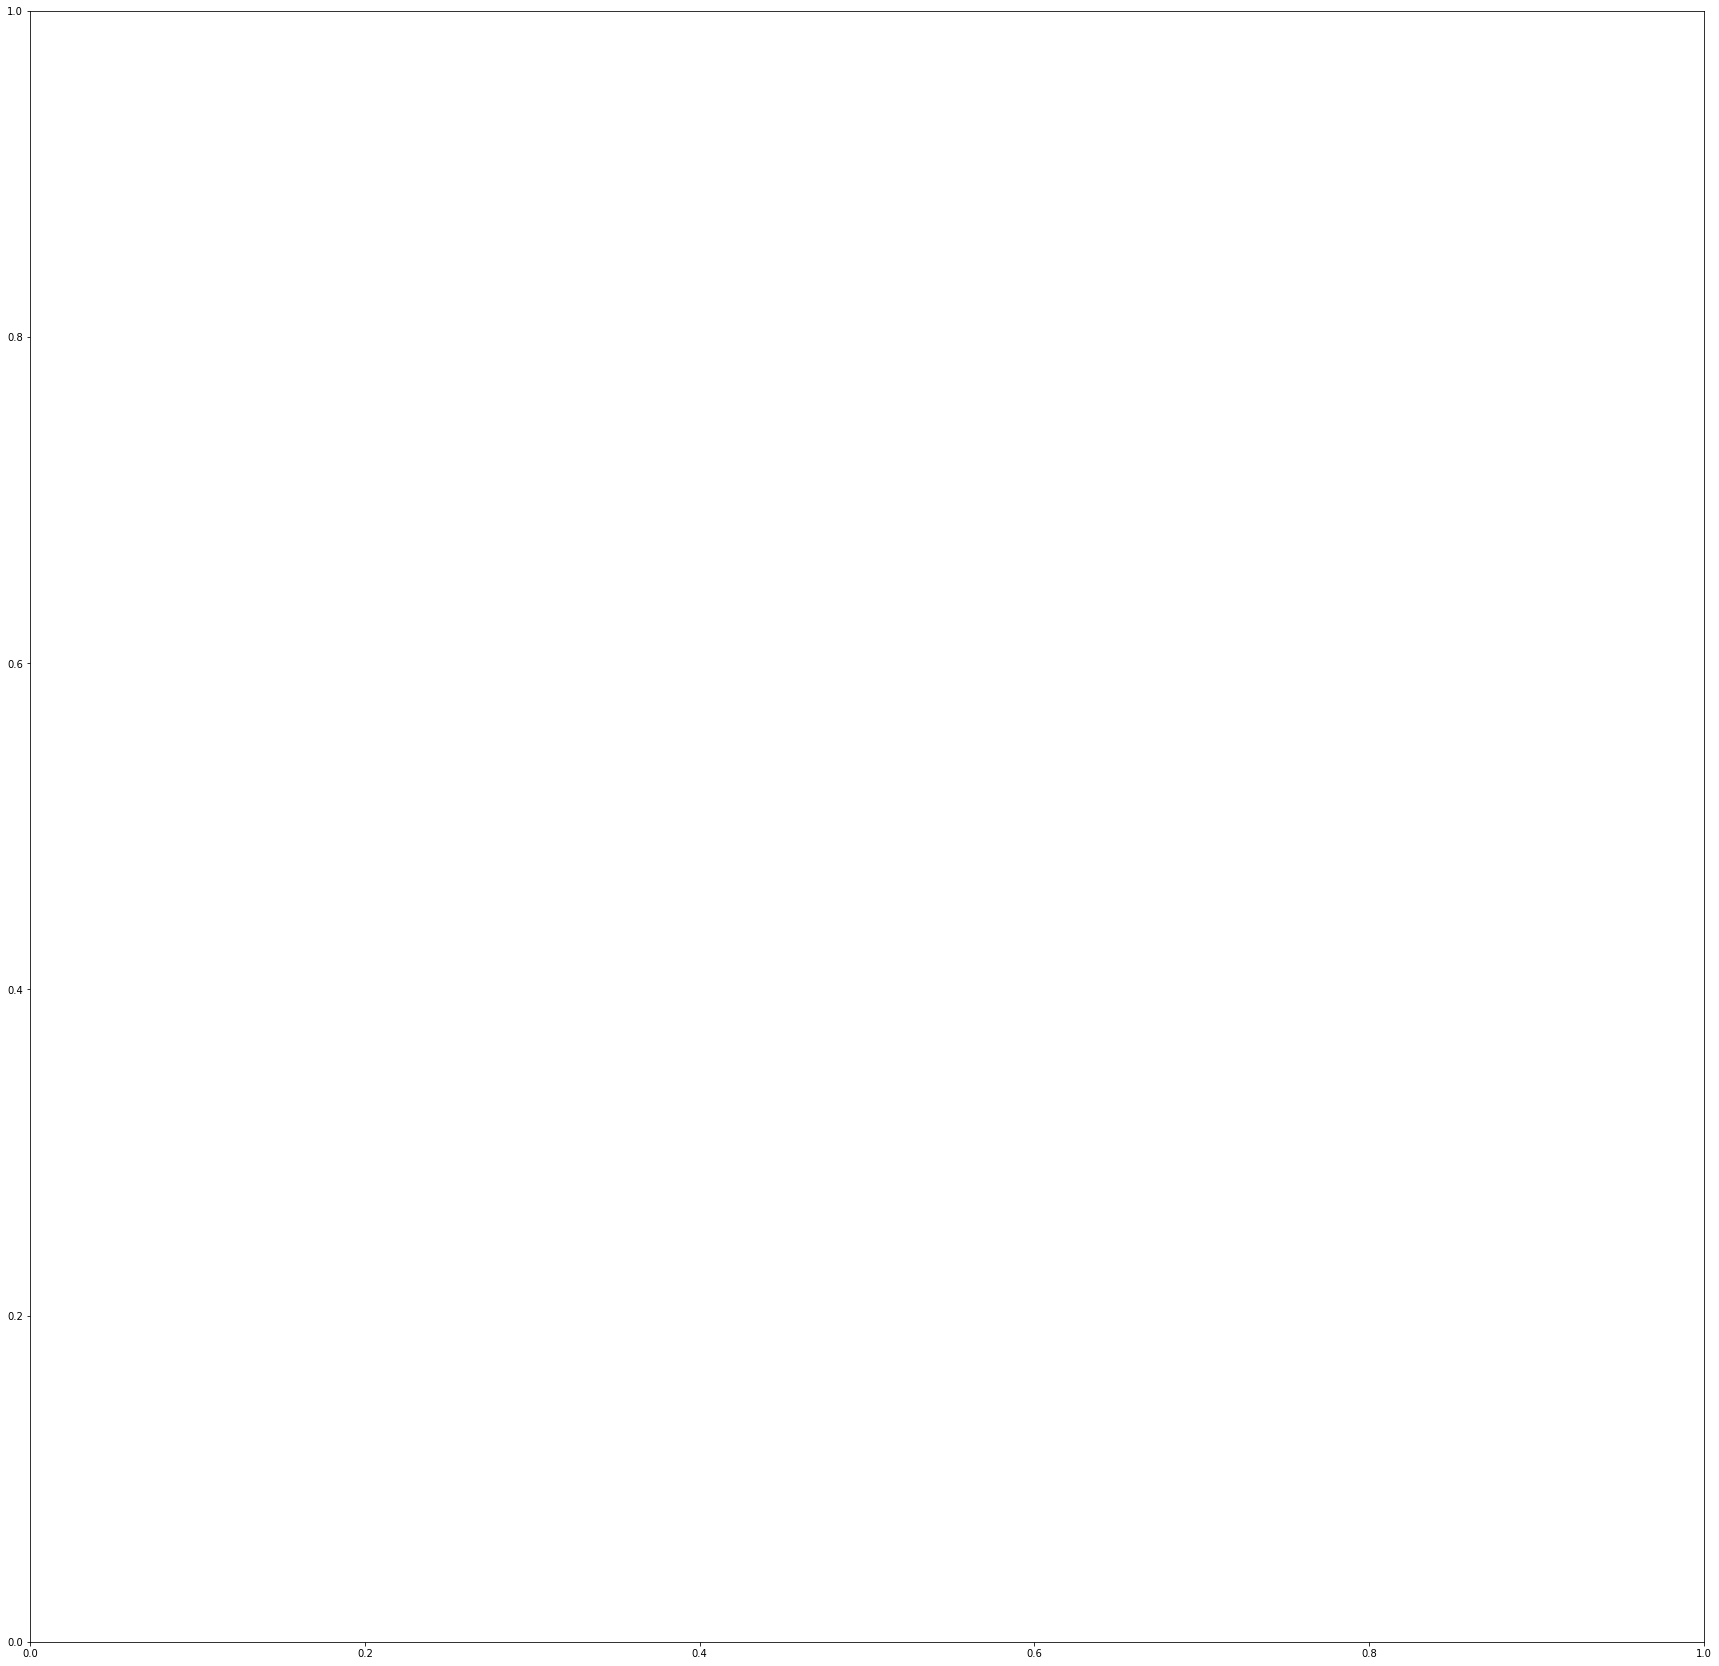

In [76]:
all_data2.plot(column='county_density',figsize=(30, 30))


AttributeError: Unknown property column

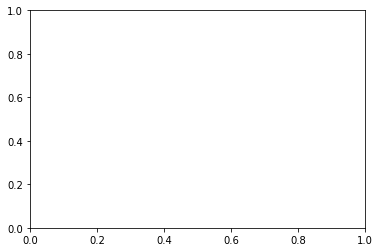

In [73]:
all_data.plot(column='tract_density')

In [78]:
all_data2.describe()

,GEO.id2,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,P4-D001,P4-D002,P4-D003,H1-D001,H3-D001,H3-D002,H3-D003,H4-D001,H4-D002,H4-D003,H4-D004,H5-D001,H5-D002,H5-D003,H5-D004,H5-D005,H5-D006,H5-D007,H5-D008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,CENSUSAREA,tract_density,county_population,county_area,county_density
count,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.112073e+10,3452.683333,3452.683333,3218.591667,136.566667,7.158333,11.450000,1.433333,32.933333,44.550000,3452.683333,3380.033333,72.650000,1609.750000,1609.750000,1369.250000,240.500000,1369.250000,564.766667,421.958333,382.525000,240.500000,42.475000,2.616667,21.150000,9.116667,75.008333,0.891667,89.241667,27.709087,3.892303,0.318419,93.352395,1.968679,14.554309,65.541542,563.708937,36161.391667,329.052858,117.303049
std,6.960250e+07,1597.914534,1597.914534,1519.986436,274.786815,4.807200,15.992041,4.330337,54.882722,38.314455,1597.914534,1557.470336,97.178053,720.659388,720.659388,612.664223,207.361577,612.664223,329.657926,208.625288,294.872682,207.361577,36.400887,2.831941,15.411798,6.916286,176.563436,1.864285,46.991327,17.218618,7.263161,0.459918,8.669074,2.151288,6.991326,46.694800,1492.981676,74122.757215,129.138832,223.632674
min,2.100197e+10,947.000000,947.000000,810.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,947.000000,920.000000,2.000000,500.000000,500.000000,404.000000,62.000000,404.000000,25.000000,19.000000,79.000000,62.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,11.000000,10.644007,0.000000,0.000000,40.074166,0.105208,4.518950,0.186000,13.694288,2282.000000,99.911000,20.233290
25%,2.106119e+10,2291.000000,2291.000000,2070.500000,8.000000,3.000000,2.000000,0.000000,6.000000,20.000000,2291.000000,2263.750000,22.000000,1057.750000,1057.750000,900.500000,128.000000,900.500000,338.000000,264.750000,182.500000,128.000000,15.750000,1.000000,9.000000,4.000000,13.750000,0.000000,55.750000,17.440722,0.273870,0.087903,93.567678,0.742678,10.652871,28.587750,31.635522,12385.250000,234.287500,39.037586
50%,2.112095e+10,3154.000000,3154.000000,2944.500000,27.500000,7.000000,6.000000,0.000000,14.000000,32.000000,3154.000000,3091.000000,39.000000,1454.000000,1454.000000,1254.500000,185.000000,1254.500000,527.500000,410.000000,289.500000,185.000000,33.000000,2.000000,17.000000,8.000000,22.500000,0.000000,83.000000,21.651245,0.829233,0.163972,97.004344,1.295780,13.118777,66.210000,48.201422,18751.000000,305.892500,59.801865
75%,2.118044e+10,4342.750000,4342.750000,4047.750000,131.250000,10.000000,13.000000,1.000000,29.000000,55.250000,4342.750000,4234.250000,77.750000,2056.500000,2056.500000,1748.750000,278.000000,1748.750000,711.500000,527.750000,472.000000,278.000000,54.750000,4.000000,29.250000,13.250000,57.000000,1.000000,122.250000,30.187339,3.718752,0.359132,98.164118,2.117092,16.279109,91.671500,131.647851,35619.000000,410.143250,95.984615
max,2.123905e+10,8164.000000,8164.000000,7891.000000,2201.000000,21.000000,94.000000,33.000000,329.000000,239.000000,8164.000000,8030.000000,510.000000,3415.000000,3415.000000,3139.000000,1389.000000,3139.000000,1807.000000,1143.000000,1645.000000,1389.000000,175.000000,15.000000,74.000000,35.000000,1127.000000,13.000000,234.000000,94.527363,54.412855,2.824621,99.209861,13.104326,51.706263,242.274000,8478.494624,741096.000000,786.833000,1948.084106


In [81]:
crs = {'init': 'epsg:4326'}
gdf = gp.GeoDataFrame(all_data, crs=crs, geometry=all_data2['geometry'])


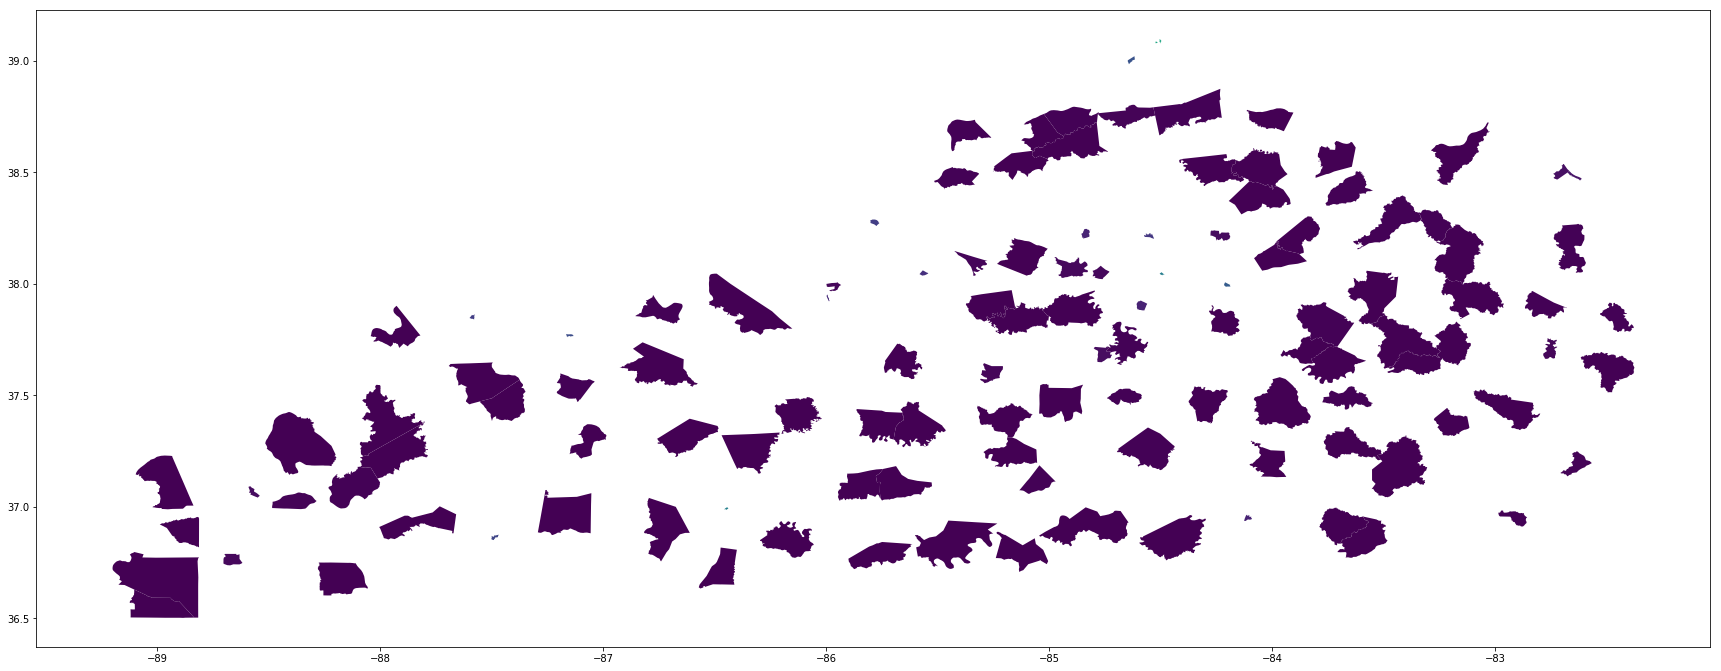

In [83]:
gdf.plot(column='tract_density',figsize=(30, 30))